In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Simulate a dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=8,
                           n_informative=5, n_redundant=0,
                           random_state=42, weights=[0.7, 0.3])

# Create DataFrame
columns = ['Income', 'Age', 'DebtRatio', 'MonthlyDebt', 'CreditLines',
           'LatePayments', 'YearsOfCreditHistory', 'NumberOfDependents']
df = pd.DataFrame(X, columns=columns)
df['Default'] = y
df.head()


,Income,Age,DebtRatio,MonthlyDebt,CreditLines,LatePayments,YearsOfCreditHistory,NumberOfDependents,Default
0,0.163432,1.458169,-0.477128,0.745447,0.725516,-0.729428,-1.341127,0.466312,0
1,2.339129,2.289595,0.855475,-0.334088,-0.995297,0.630595,-0.177870,2.081497,0
2,0.991750,-0.564641,4.781310,0.179071,-1.394356,3.638629,-1.541705,1.616697,0
3,-0.927050,-1.142734,2.589444,-1.085923,-1.605217,-0.810558,0.563229,-1.403526,1
4,-0.473276,1.068028,1.051222,0.531490,0.443739,1.867333,-0.370503,0.566350,0


In [3]:
X = df.drop('Default', axis=1)
y = df['Default']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [5]:
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    print(f"\n🔍 {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))



🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.57      0.52      0.54        54

    accuracy                           0.77       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.76      0.77      0.76       200

ROC-AUC Score: 0.6873414510400813

🔍 Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       146
           1       0.87      0.74      0.80        54

    accuracy                           0.90       200
   macro avg       0.89      0.85      0.87       200
weighted avg       0.90      0.90      0.90       200

ROC-AUC Score: 0.8498224251648909

🔍 Random Forest
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       146
           1       0.91      0.76      0.83        54

    accuracy                           0.92       200
   

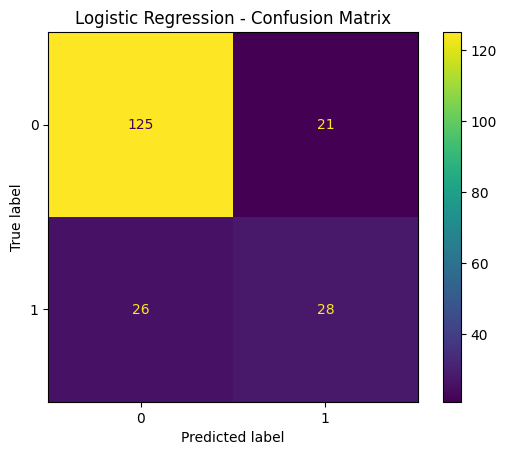

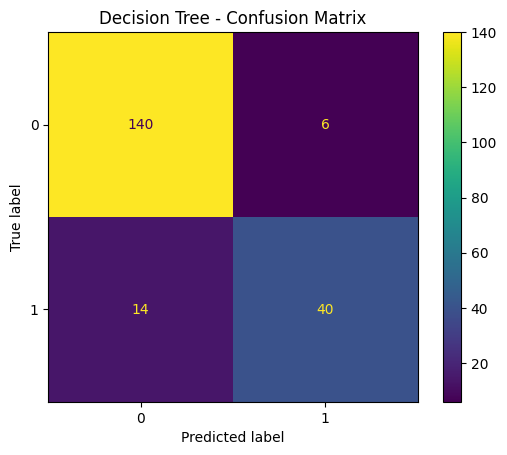

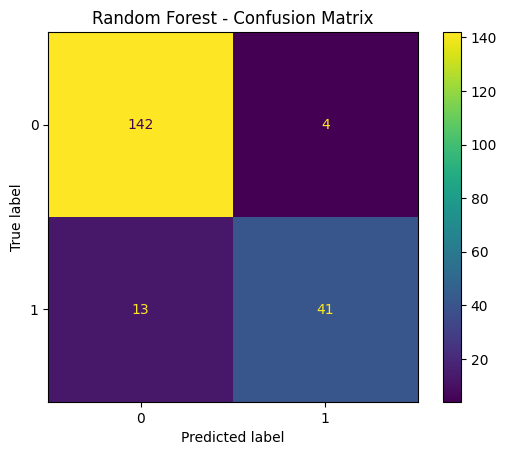

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [13]:
# Define a test input
sample_data = [[50000, 35, 0.3, 800, 5, 1, 10, 2]]

# Create DataFrame with column names
sample_df = pd.DataFrame(sample_data, columns=['Income', 'Age', 'DebtRatio', 'MonthlyDebt',
                                                'CreditLines', 'LatePayments',
                                                'YearsOfCreditHistory', 'NumberOfDependents'])

# Scale and predict
sample_scaled = scaler.transform(sample_df)
prediction = rf.predict(sample_scaled)

# Output
print(" Default Risk Prediction:", "Likely to Default" if prediction[0] == 1 else "Low Risk")


 Default Risk Prediction: Low Risk
